# Introduction 
Dataset contains information from an Assessor's Office used in computing value of home (SalePrice) for residential properties sold in Iowa from 2006 to 2010. The dataset is used to predict SalePrice based on a number of features
# Objective
1. Understand the Dataset
2. Exploratory Data Analysis
3. Feature Analysis
4. Feature Selection
5. Recommendation on the model to be used 


# Exploratory Data Analysis
Importing libraries

In [149]:
import itertools
from json import encoder
import numpy as np # for linear algebra
import pandas as pd # for data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from scipy import stats
from yaml import warnings
pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)
#warnings.filterwarnings("ignore")


In [150]:
df = pd.read_csv('ahds.csv')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [151]:
'''Getting the shape of the dataset, highlighting the rows and the columns'''
r,c = df.shape
print(" Dataset has {} rows and {} columns".format(r,c))

 Dataset has 2930 rows and 82 columns


In [152]:
'''The dataset types, the column name and the count'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [153]:
'''Getting the statistical information of the numerical data'''
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [154]:
'''This is the statistical review of the categorical data'''
df.describe(include='object')

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
count,2930,2930,198,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2907,2930,2930,2930,2850,2850,2847,2850,2849,2930,2930,2930,2929,2930,2930,1508,2773,2771,2771,2771,2930,13,572,106,2930,2930
unique,7,2,2,4,4,3,5,3,28,9,8,5,8,6,8,16,17,5,4,5,6,5,5,4,6,6,6,5,2,5,5,8,5,6,3,5,5,3,4,4,5,10,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,2273,2918,120,1859,2633,2927,2140,2789,443,2522,2900,2425,1481,2321,2887,1026,1015,1752,1799,2549,1310,1283,2616,1906,859,2499,2885,1495,2734,2682,1494,2728,744,1731,1231,2615,2665,2652,4,330,95,2536,2413


In [155]:
df.describe(include =['int64'])

,Order,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,10147.921843,6.094881,5.563140,1971.356314,1984.266553,1159.557679,335.455973,4.676792,1499.690444,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,7880.017759,1.411026,1.111537,30.245361,20.860286,391.890885,428.395715,46.310510,505.508887,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,876.250000,0.000000,0.000000,1126.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,1084.000000,0.000000,0.000000,1442.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,1384.000000,703.750000,0.000000,1742.750000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5095.000000,2065.000000,1064.000000,5642.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [156]:
df.describe(include=['float64'])

,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Yr Blt,Garage Cars,Garage Area
count,2440.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2928.000000,2928.000000,2771.000000,2929.000000,2929.000000
mean,69.224590,101.896801,442.629566,49.722431,559.262547,1051.614544,0.431352,0.061134,1978.132443,1.766815,472.819734
std,23.365335,179.112611,455.590839,169.168476,439.494153,440.615067,0.524820,0.245254,25.528411,0.760566,215.046549
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,0.000000,0.000000
25%,58.000000,0.000000,0.000000,0.000000,219.000000,793.000000,0.000000,0.000000,1960.000000,1.000000,320.000000
50%,68.000000,0.000000,370.000000,0.000000,466.000000,990.000000,0.000000,0.000000,1979.000000,2.000000,480.000000
75%,80.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1.000000,0.000000,2002.000000,2.000000,576.000000
max,313.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,3.000000,2.000000,2207.000000,5.000000,1488.000000


In [157]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [158]:
df.dtypes

Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 82, dtype: object

In [159]:
df.nunique()

Order             2930
PID               2930
MS SubClass         16
MS Zoning            7
Lot Frontage       128
                  ... 
Mo Sold             12
Yr Sold              5
Sale Type           10
Sale Condition       6
SalePrice         1032
Length: 82, dtype: int64

Checking if you have missing values 

In [160]:
df.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

Examine columns 'PID' and 'Order'. Would you use them for modeling? If not, why?

In [161]:
df[['Order', 'PID']]

,Order,PID
0,1,526301100
1,2,526350040
2,3,526351010
3,4,526353030
4,5,527105010
...,...,...
2925,2926,923275080
2926,2927,923276100
2927,2928,923400125
2928,2929,924100070


Yes we can use Order and PID since they are the Metadata, meaning they are the input elements that describe things, asnweing questions such as when it was bought etc. 

## Focusing on Numerical Features 
Identify three Features which I suspect have outliers

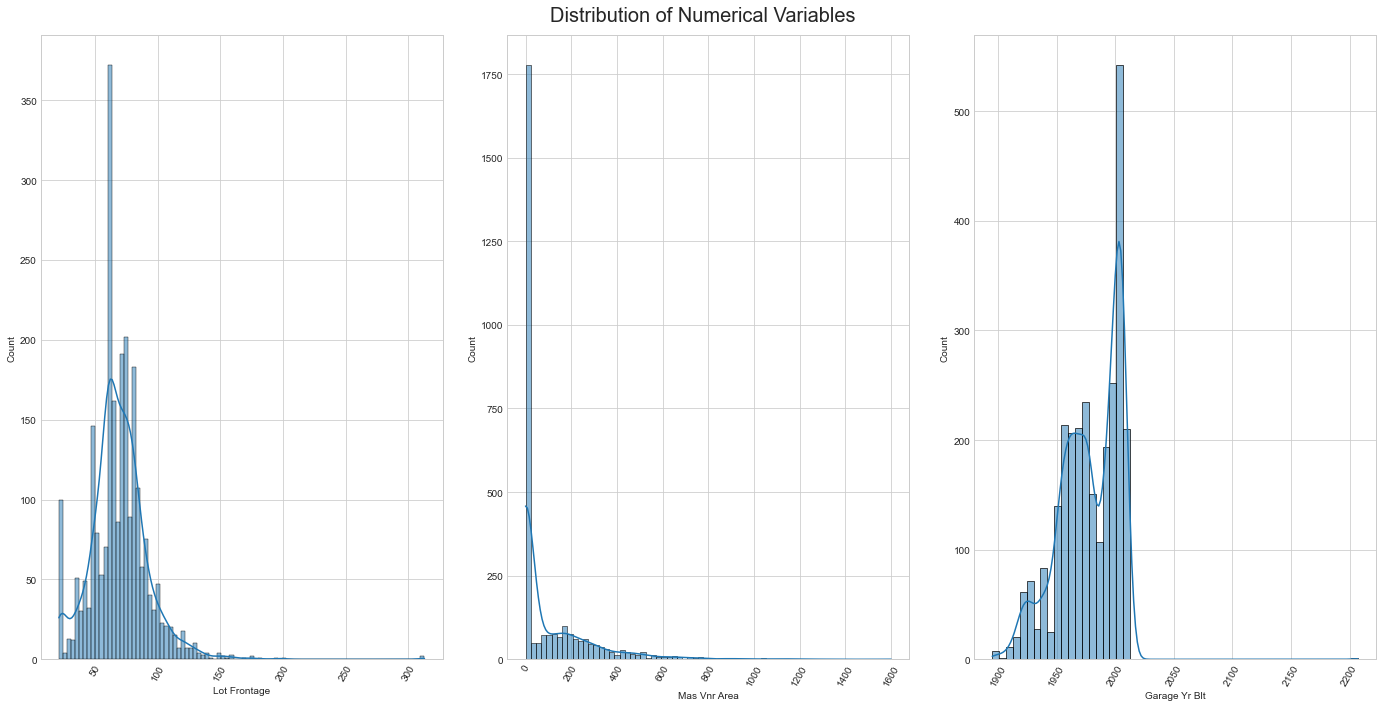

In [162]:
fig, axes = plt.subplots(1,3,figsize=(20,10))
axes_flat = axes.flatten()
fig.tight_layout(h_pad = 6, w_pad = 4, pad=4)
fig.suptitle("Distribution of Numerical Variables", fontsize=20)

for ax_idx, feat in enumerate(['Lot Frontage','Mas Vnr Area','Garage Yr Blt']):
    sns.histplot(data=df, x=feat, element='bars', kde=True, ax=axes_flat[ax_idx])
    axes_flat[ax_idx].tick_params(axis='x',labelrotation=60)


<AxesSubplot:xlabel='BsmtFin SF 1'>

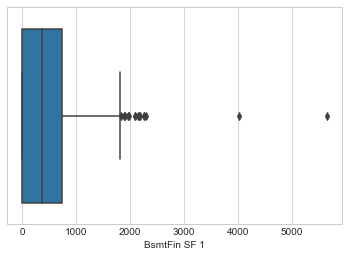

In [163]:
sns.boxplot(x=df['BsmtFin SF 1'])

<AxesSubplot:xlabel='Garage Yr Blt'>

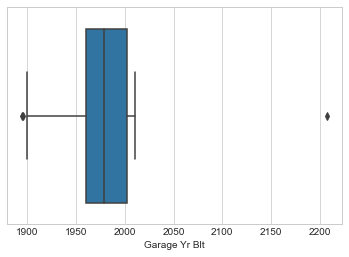

In [164]:
sns.boxplot(x=df['Garage Yr Blt'])

<AxesSubplot:xlabel='Mas Vnr Area'>

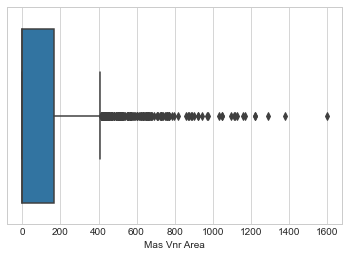

In [165]:
sns.boxplot(x=df['Mas Vnr Area'])


<AxesSubplot:xlabel='Lot Frontage'>

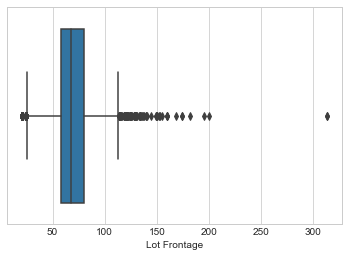

In [166]:
sns.boxplot(x=df['Lot Frontage'])

Perform a fix for these outliers and show plots after the fix

Describe the approach and your reason you chose the approach. 

In [167]:
from scipy.stats.mstats import winsorize

In [168]:
for v in ['Lot Frontage','Mas Vnr Area','Garage Yr Blt']:
    df[v] = winsorize(df[v],limits=[.01,.99])

c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


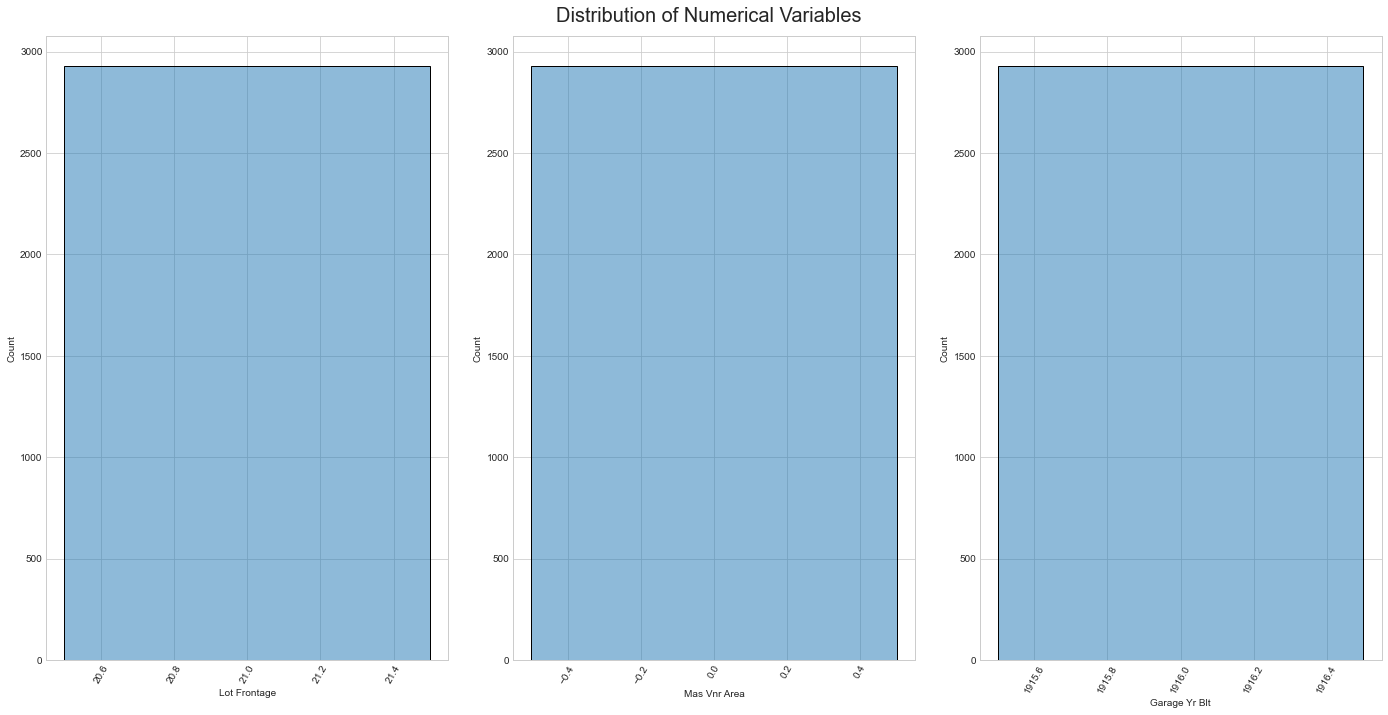

In [169]:
fig, axes = plt.subplots(1,3,figsize=(20,10))
axes_flat = axes.flatten()
fig.tight_layout(h_pad = 6, w_pad = 4, pad=4)
fig.suptitle("Distribution of Numerical Variables", fontsize=20)

for ax_idx, feat in enumerate(['Lot Frontage','Mas Vnr Area','Garage Yr Blt']):
    sns.histplot(data=df, x=feat, element='bars', kde=True, ax=axes_flat[ax_idx])
    axes_flat[ax_idx].tick_params(axis='x',labelrotation=60)

## Missing Values 
- Top 3 features with the highest number of missing values 
- Handling them
- Performing imputation for the missing values and showing summary statistics after the fix
- Describe the approaches and reasons for the choosen methods. 

<AxesSubplot:>

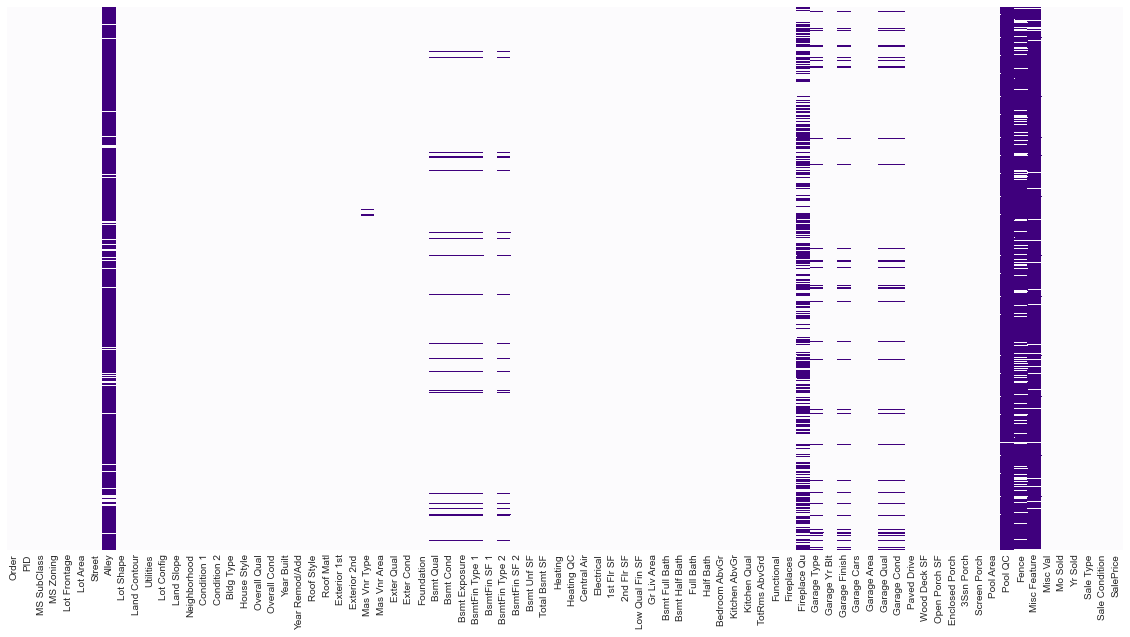

In [170]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Purples', ax=ax)

The purple areas represent the missing values

In [171]:
col_drop_missing_val_thr = 15 #percent. Drop col if missing values greater than this.

df_mvcount = df.isnull().sum() #Get the count of missing values of each feature.
df_mvpercent = df_mvcount*100/df.shape[0]

df_mvsummary = pd.concat([df_mvcount, df_mvpercent], axis=1, )
#Concat the two into a single dataframe.
df_mvsummary.columns = ['count','percent'] #Give column headings.

with pd.option_context('display.max_rows',None,):
    print("Missing Values Table:\n", df_mvsummary.sort_values(by='count', ascending=False).iloc[:])
    
df_mvsummary[df_mvsummary['percent']>col_drop_missing_val_thr]

Missing Values Table:
                  count    percent
Pool QC           2917  99.556314
Misc Feature      2824  96.382253
Alley             2732  93.242321
Fence             2358  80.477816
Fireplace Qu      1422  48.532423
Garage Finish      159   5.426621
Garage Qual        159   5.426621
Garage Cond        159   5.426621
Garage Type        157   5.358362
Bsmt Exposure       83   2.832765
BsmtFin Type 2      81   2.764505
Bsmt Qual           80   2.730375
Bsmt Cond           80   2.730375
BsmtFin Type 1      80   2.730375
Mas Vnr Type        23   0.784983
Bsmt Full Bath       2   0.068259
Bsmt Half Bath       2   0.068259
BsmtFin SF 1         1   0.034130
Bsmt Unf SF          1   0.034130
Total Bsmt SF        1   0.034130
Garage Area          1   0.034130
Garage Cars          1   0.034130
Electrical           1   0.034130
BsmtFin SF 2         1   0.034130
Kitchen Qual         0   0.000000
Kitchen AbvGr        0   0.000000
Bedroom AbvGr        0   0.000000
Half Bath            0   

,count,percent
Alley,2732,93.242321
Fireplace Qu,1422,48.532423
Pool QC,2917,99.556314
Fence,2358,80.477816
Misc Feature,2824,96.382253


In [172]:
cols_to_drop = df_mvsummary[df_mvsummary['percent']>col_drop_missing_val_thr].index
df_dc = df.drop(cols_to_drop, axis = 1)  #dc for dropped columns.
set(df) - set(df_dc)   #Set algebra makes it quick.
#We verify that we have indeed dropped those 6 columns.

{'Alley', 'Fence', 'Fireplace Qu', 'Misc Feature', 'Pool QC'}

In [173]:
df_dc.dropna(inplace=True)
print("Rows dropped: ", df.shape[0] - df_dc.shape[0])

Rows dropped:  252


<AxesSubplot:>

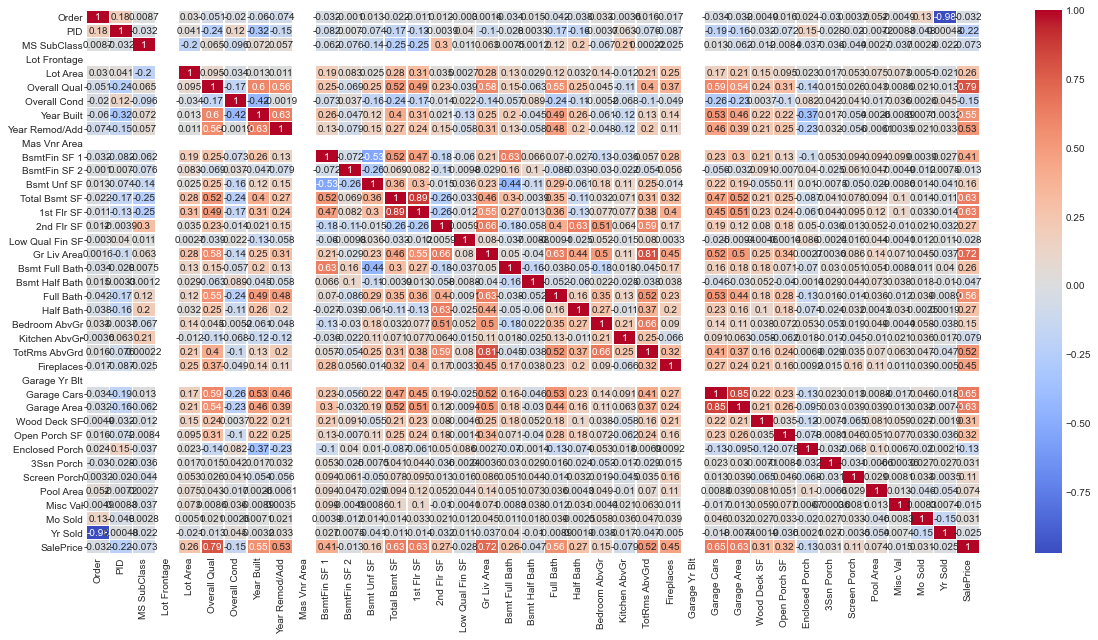

In [174]:
plt.figure(figsize=(20,10))
sns.heatmap(df_dc.corr(), cmap ='coolwarm', annot =True, linewidth =0.5)

## Feature Analysis & Selection

,feature,unique cnt,data type
0,Garage Yr Blt,1,float64
1,Lot Frontage,1,float64
2,Mas Vnr Area,1,float64
3,Street,2,object
4,Central Air,2,object
...,...,...,...
72,Bsmt Unf SF,1115,float64
73,Gr Liv Area,1236,int64
74,Lot Area,1839,int64
75,PID,2678,int64


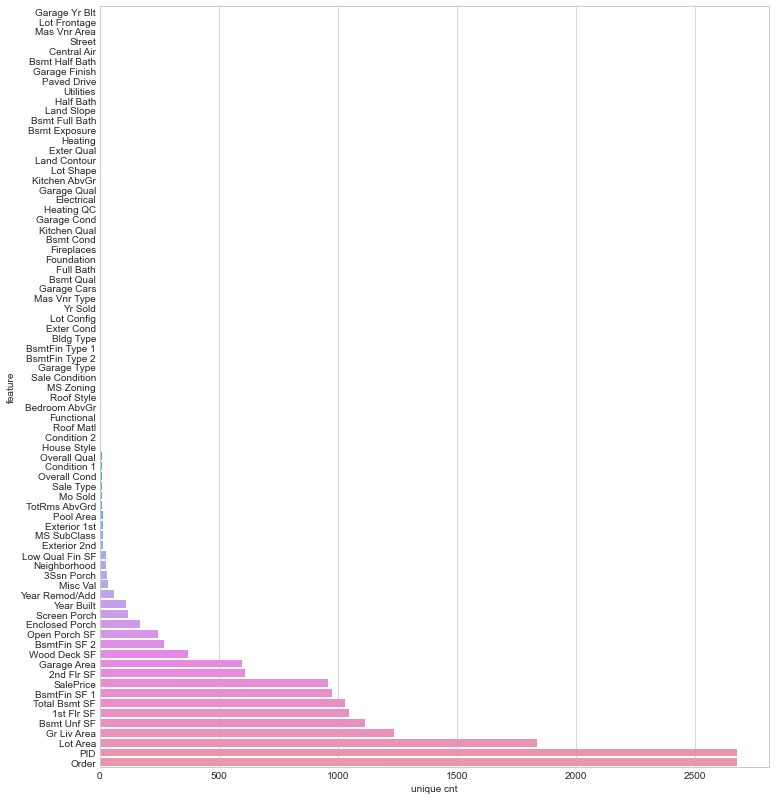

In [175]:
featcounts = []
# Create a dataframe of feature counts.
for feat in list(df_dc):
    featcounts.append((feat, len(df_dc[feat].unique()), df_dc[feat].dtype))
    #Create an array of tuples with feature names and feature unique counts.

featcounts_df = pd.DataFrame(featcounts, columns = ['feature','unique cnt','data type'])
featcounts_df.sort_values(by = 'unique cnt', inplace = True)
featcounts_df.reset_index(drop = True, inplace = True)

#After creating a dataframe of features and unique counts, we plot it as a bar plot.
fig, ax = plt.subplots(1,1,figsize=(12,14))
sns.barplot(x=featcounts_df['unique cnt'], y=featcounts_df['feature'], ax=ax)
featcounts_df

From the above bar chart we see an enormous range of values. From closer examination, we see that features upto Neighborhood could be categorical. This could be our 'reasonable' count. However, we need to examine each feature and its count to check whether it is a categorical.

We decide to treat Year as non-categorical.

Since this is a rough-cut visualization, we will inspect and pick some high value-count features for a pair-plot.

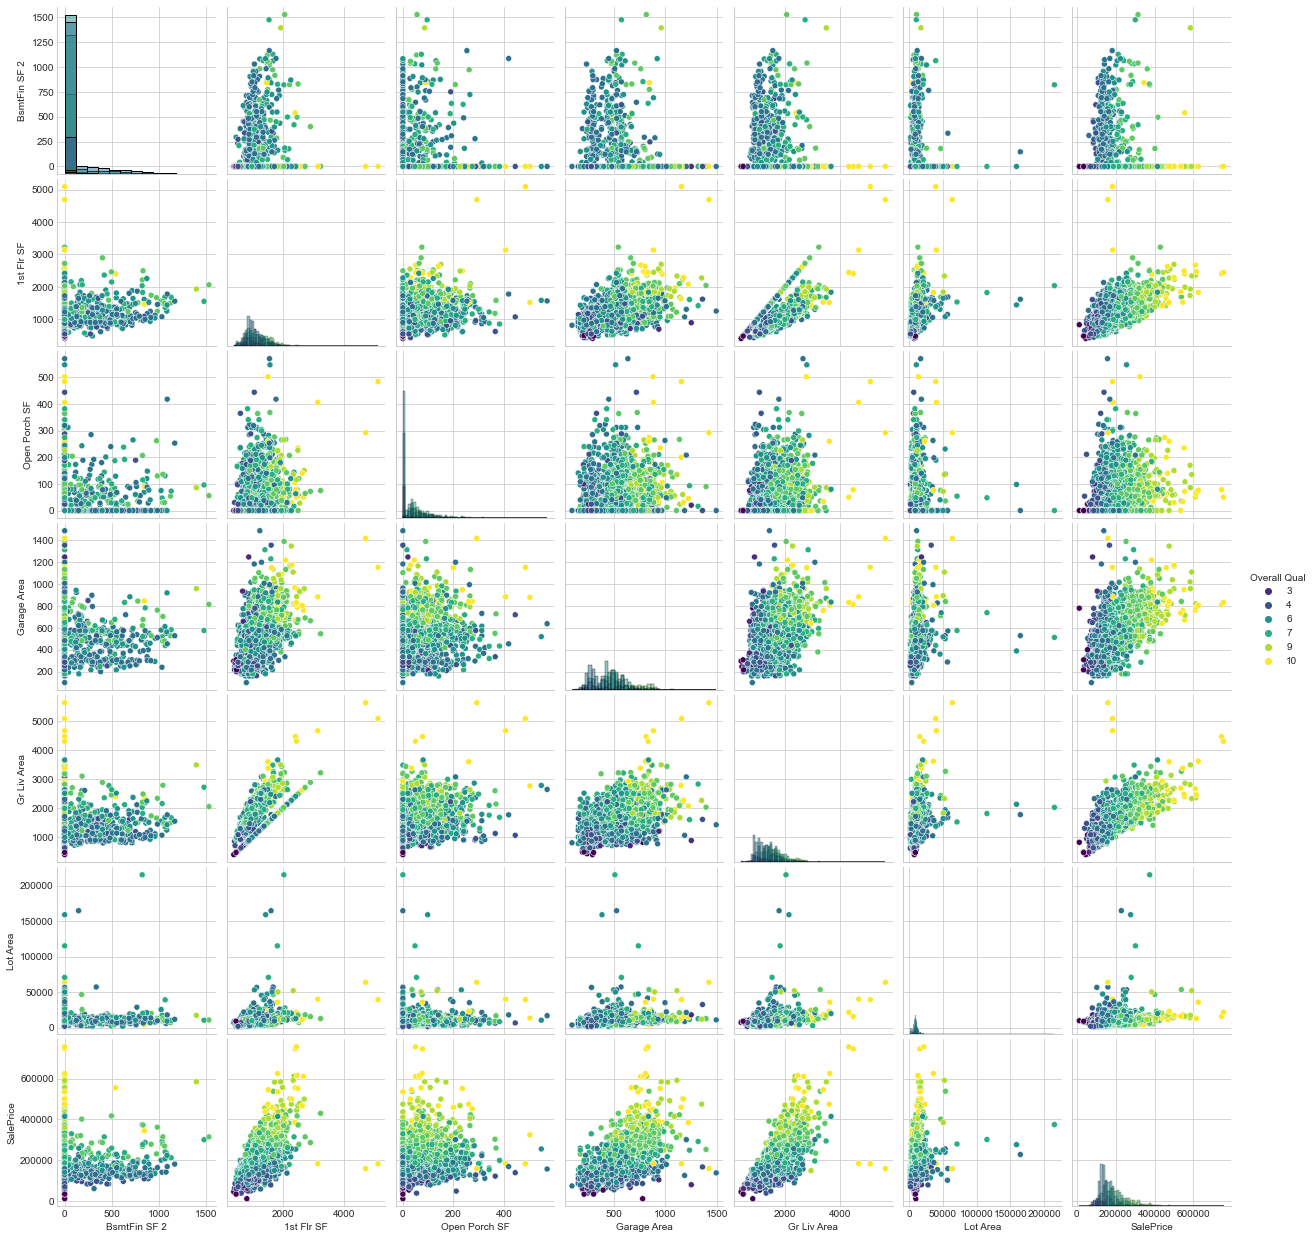

In [176]:
#The plot is stratified on the 'OverallQual' categorical variable.
sns.pairplot(df_dc[['BsmtFin SF 2','1st Flr SF','Open Porch SF','Garage Area',
                        'Gr Liv Area','Lot Area','SalePrice','Overall Qual']], hue='Overall Qual',
            diag_kind='hist', palette='viridis')

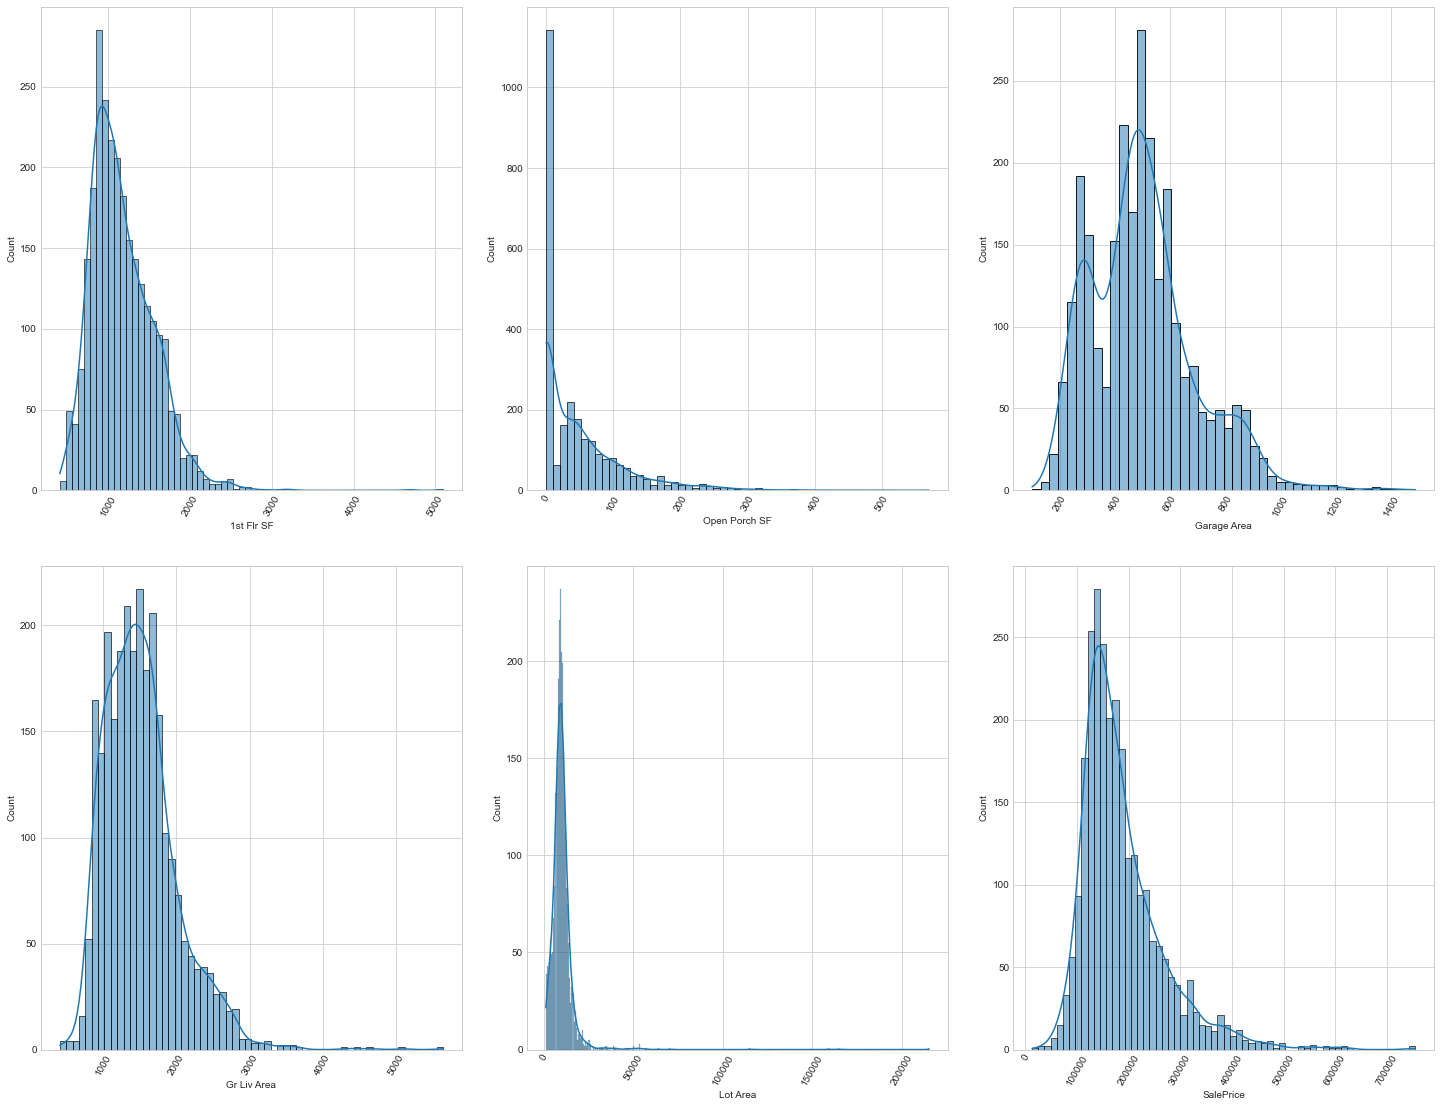

In [177]:
fig, axes = plt.subplots(2,3,figsize=(20,15))
axes_flat = axes.flatten()
fig.tight_layout(h_pad = 6, w_pad = 4)

for ax_idx, feat in enumerate(['1st Flr SF','Open Porch SF','Garage Area','Gr Liv Area','Lot Area','SalePrice']):
    sns.histplot(data=df_dc, x=feat, element='bars', kde=True, ax=axes_flat[ax_idx])
    axes_flat[ax_idx].tick_params(axis='x', labelrotation = 60)

From this limited view, we observe that the distributions are fat-tailed with a right skew. Besides, they do not follow the normal curve. The outliers are persistent/numerous and appear to be a characteristic of the data rather than an accident of faulty data-gathering. Hence, we will attempt to use non-parametric means for further analysis without attempting to remove the numerous outliers

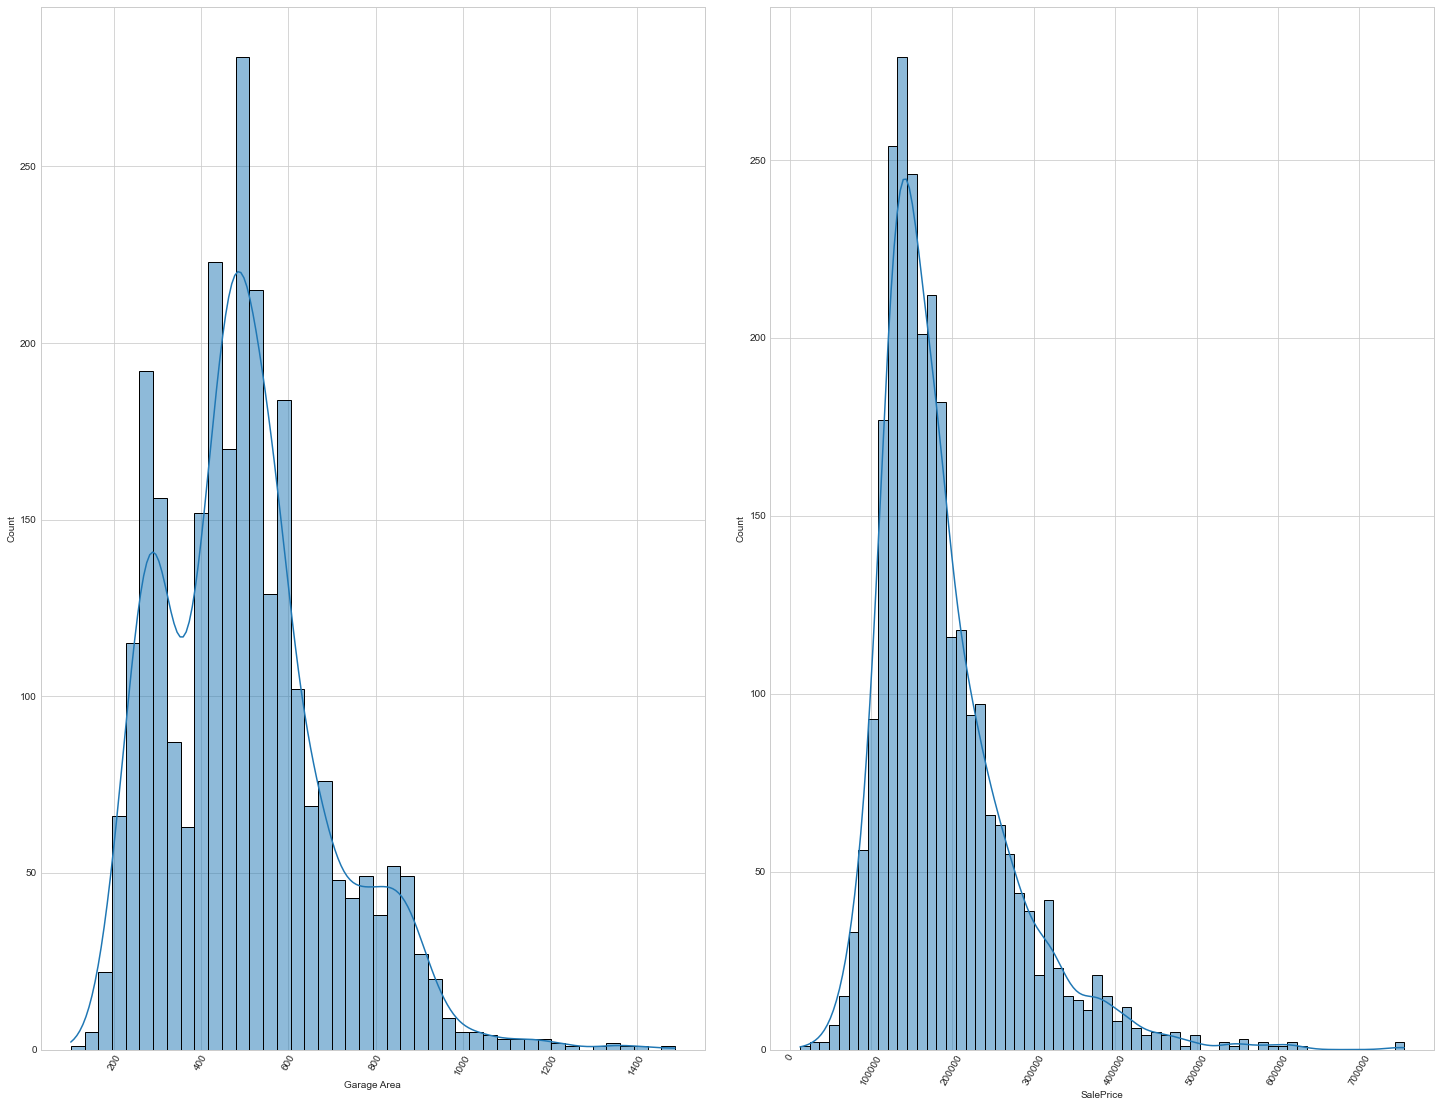

In [178]:
fig, axes = plt.subplots(1,2,figsize=(20,15))
axes_flat = axes.flatten()
fig.tight_layout(h_pad = 6, w_pad = 4)

for ax_idx, feat in enumerate(['Garage Area','SalePrice']):
    sns.histplot(data=df_dc, x=feat, element='bars', kde=True, ax=axes_flat[ax_idx])
    axes_flat[ax_idx].tick_params(axis='x', labelrotation = 60)

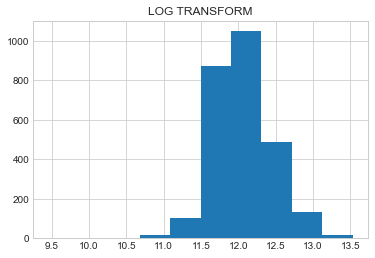

In [179]:
plt.hist(np.log(df_dc['SalePrice']))
plt.title('LOG TRANSFORM')
plt.show()

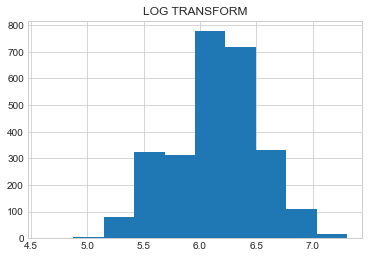

In [180]:
plt.hist(np.log(df_dc['Garage Area']))
plt.title('LOG TRANSFORM')
plt.show()

In [181]:
featcounts_int64_df = featcounts_df[(featcounts_df['data type'] == 'int64') | (featcounts_df['data type'] == 'float64')].reset_index(drop=True)
featcounts_int64_df

,feature,unique cnt,data type
0,Garage Yr Blt,1,float64
1,Lot Frontage,1,float64
2,Mas Vnr Area,1,float64
3,Bsmt Half Bath,3,float64
4,Half Bath,3,int64
5,Bsmt Full Bath,3,float64
6,Kitchen AbvGr,4,int64
7,Fireplaces,5,int64
8,Full Bath,5,int64
9,Garage Cars,5,float64


In [182]:
df_dc['Overall Cond'].unique()

array([5, 6, 7, 2, 8, 4, 9, 3, 1], dtype=int64)

In [183]:
feat_2b_str = ['MS SubClass']
feat_2b_str.sort()

print(f'Count: {len(feat_2b_str)}\n{feat_2b_str}')

Count: 1
['MS SubClass']


In [184]:
for feat in feat_2b_str:
    df_dc[feat] = df_dc[feat].astype('str')
#check the dataframe once to make sure
df_dc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2678 entries, 0 to 2929
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2678 non-null   int64  
 1   PID              2678 non-null   int64  
 2   MS SubClass      2678 non-null   object 
 3   MS Zoning        2678 non-null   object 
 4   Lot Frontage     2678 non-null   float64
 5   Lot Area         2678 non-null   int64  
 6   Street           2678 non-null   object 
 7   Lot Shape        2678 non-null   object 
 8   Land Contour     2678 non-null   object 
 9   Utilities        2678 non-null   object 
 10  Lot Config       2678 non-null   object 
 11  Land Slope       2678 non-null   object 
 12  Neighborhood     2678 non-null   object 
 13  Condition 1      2678 non-null   object 
 14  Condition 2      2678 non-null   object 
 15  Bldg Type        2678 non-null   object 
 16  House Style      2678 non-null   object 
 17  Overall Qual  

In [185]:
cat_feat_names_fin = list(df_dc.describe(include = 'object'))

print(f'Final categorical variable count: {len(cat_feat_names_fin)}\n{cat_feat_names_fin}')

Final categorical variable count: 39
['MS SubClass', 'MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Sale Type', 'Sale Condition']


<AxesSubplot:ylabel='SalePrice'>

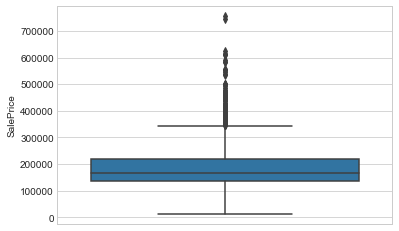

In [186]:
sns.boxplot(data = df_dc, y = 'SalePrice', whis = 1.5)

In [187]:
df_dc['SalePrice'].sort_values(ascending = False).head()

1767    755000
1760    745000
2445    625000
1063    615000
44      611657
Name: SalePrice, dtype: int64

In [188]:
df_dc.describe(include='object')

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
count,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678,2678
unique,16,6,2,4,4,3,5,3,28,9,8,5,8,6,8,14,16,5,4,5,5,5,5,4,6,6,4,5,2,5,5,8,6,3,5,5,3,10,6
top,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1008,2112,2669,1657,2409,2676,1946,2544,416,2324,2650,2258,1343,2106,2641,965,952,1549,1602,2346,1242,1186,2471,1776,827,2334,2650,1413,2559,2485,1324,2517,1676,1179,2528,2579,2491,2317,2226


## Cardinalities
Neighborhood -28
Exterior 2nd- 16
MS SubClass -16

In [189]:
le = LabelEncoder()

label = le.fit_transform(df_dc['Neighborhood'])

label

array([15, 15, 15, ..., 14, 14, 14])

In [190]:
le = LabelEncoder()

label = le.fit_transform(df_dc['MS SubClass'])

label

array([ 5,  5,  5, ...,  5,  5, 10])

In [191]:
le = LabelEncoder()

label = le.fit_transform(df_dc['Exterior 2nd'])

label

array([10, 13, 14, ...,  6,  6,  6])

In [192]:
df_dc['Garage Area'].value_counts()

576.0     96
440.0     95
484.0     73
240.0     67
528.0     61
          ..
815.0      1
1043.0     1
1184.0     1
876.0      1
428.0      1
Name: Garage Area, Length: 597, dtype: int64

In [193]:

one_hot_encoded_data = pd.get_dummies(df_dc, columns = ['Garage Area'])
print(one_hot_encoded_data)

      Order        PID MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100          20        RL          21.0     31770   Pave   
1         2  526350040          20        RH          21.0     11622   Pave   
2         3  526351010          20        RL          21.0     14267   Pave   
3         4  526353030          20        RL          21.0     11160   Pave   
4         5  527105010          60        RL          21.0     13830   Pave   
...     ...        ...         ...       ...           ...       ...    ...   
2924   2925  923251180          20        RL          21.0     20000   Pave   
2925   2926  923275080          80        RL          21.0      7937   Pave   
2926   2927  923276100          20        RL          21.0      8885   Pave   
2928   2929  924100070          20        RL          21.0     10010   Pave   
2929   2930  924151050          60        RL          21.0      9627   Pave   

     Lot Shape Land Contour Utilities Lot Config La

In [194]:
#df_dc['Garage Area'] = df_dc['Garage Area'].astype('category')

#df_dc['Gar_new'] = df_dc['Garage Area'].cat.codes

#enc=OneHotEncoder()

#enc_data=pd.DataFrame(enc.fit_transform(df_dc[['Gar_new']]).toarray())
#New_df=df_dc.join(enc_data)

#print(New_df)


In [195]:
#New_df['Gar_new'].describe()

In [196]:
#New_df.describe(include=['float64'])

In [197]:
df_dc.nunique()

Order             2678
PID               2678
MS SubClass         16
MS Zoning            6
Lot Frontage         1
                  ... 
Mo Sold             12
Yr Sold              5
Sale Type           10
Sale Condition       6
SalePrice          959
Length: 77, dtype: int64

<AxesSubplot:ylabel='SalePrice_log'>

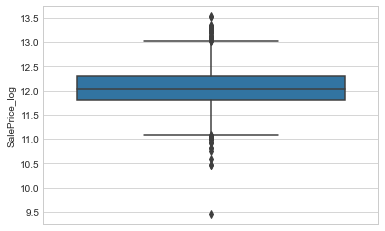

In [198]:
import math
df_dc['SalePrice_log'] = df_dc['SalePrice'].map(math.log)
sns.boxplot(data = df_dc, y = 'SalePrice_log', whis = 1.5)

It is evident that the outliers are not leaving us in a hurry. This confirms that this is indeed a fat-tailed distribution. Consequently, we will not do anything about the so-called outliers as they appear to be very much the part of the distribution.

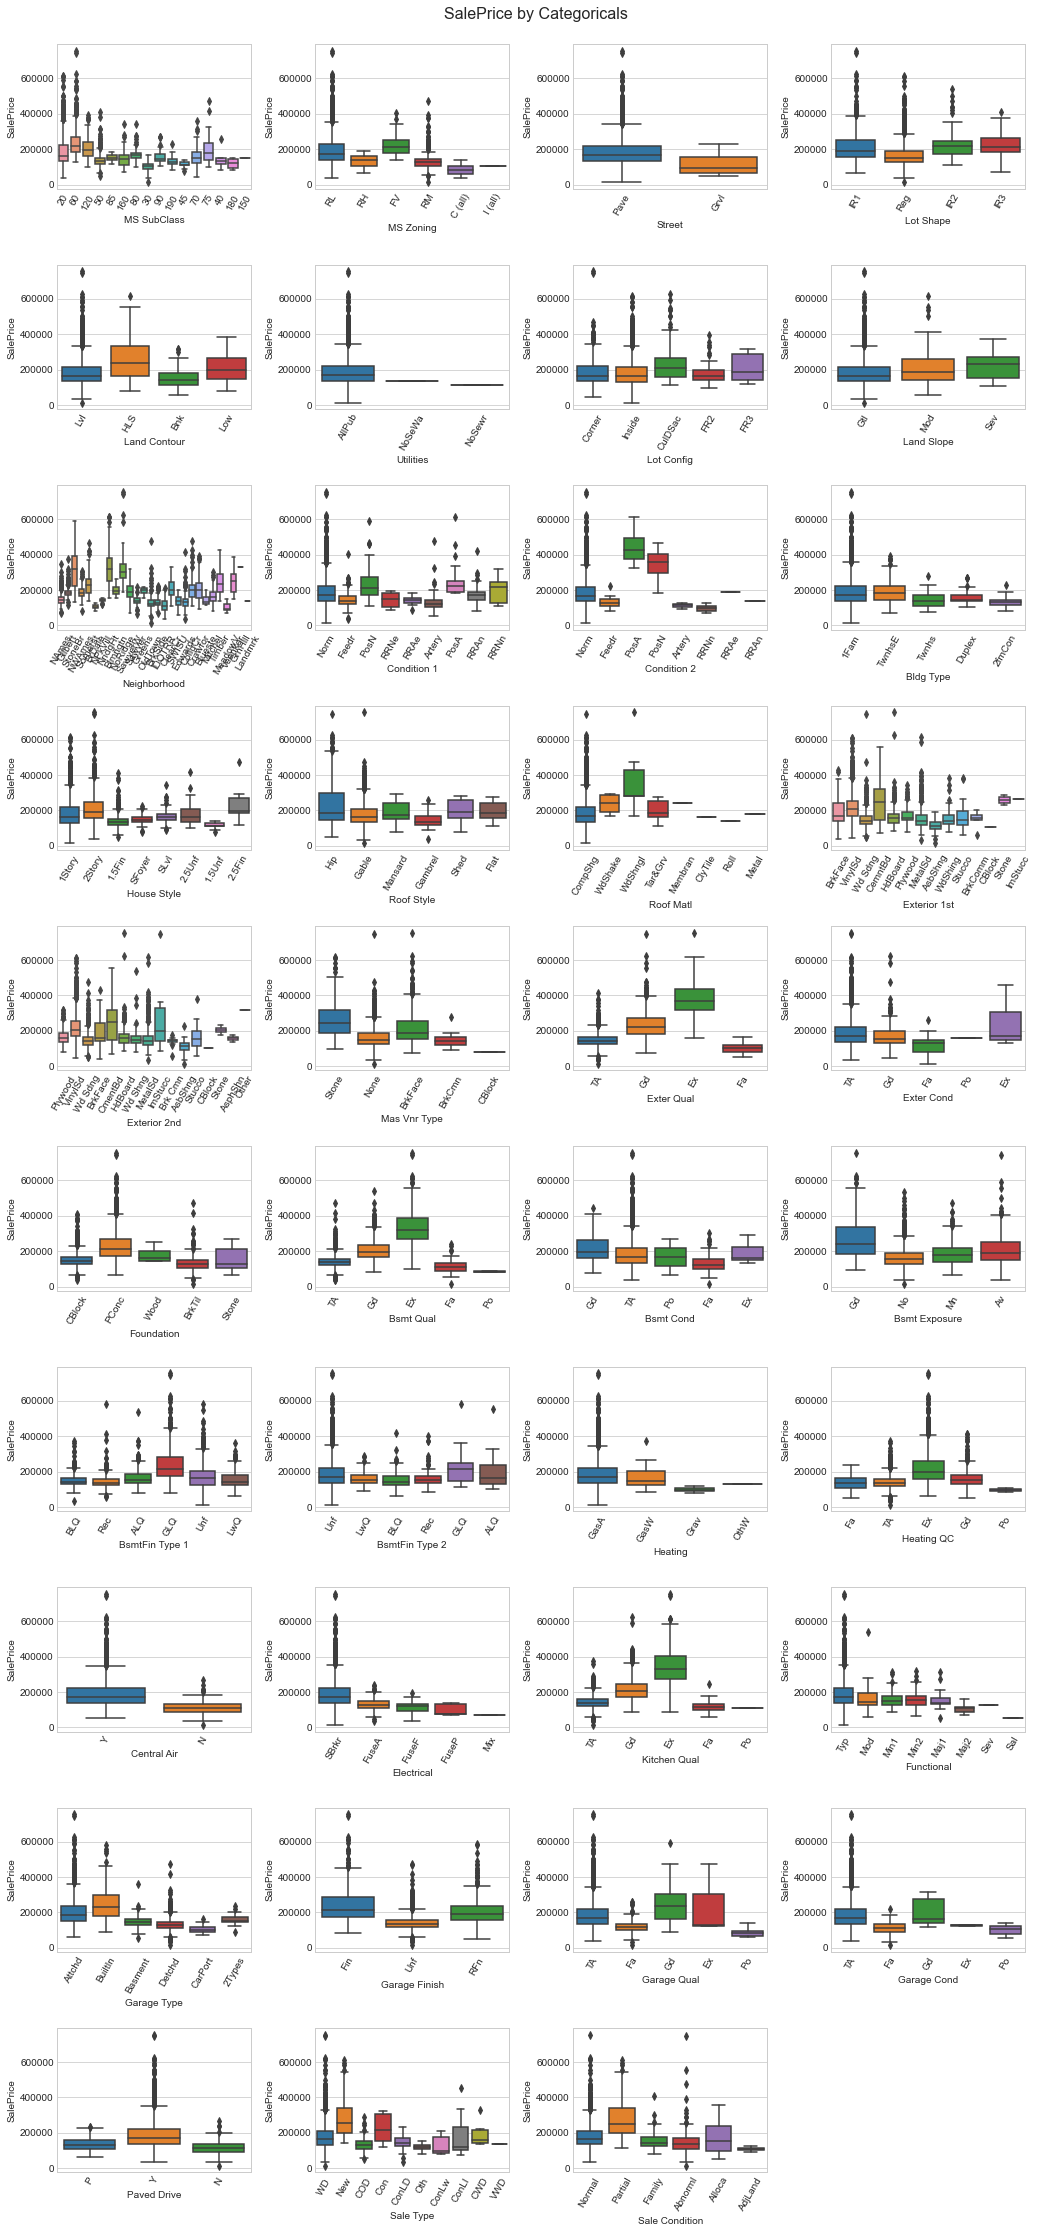

In [199]:
#We have 39 categorical vars, requiring a grid of 10x4 with the last 1 slot empty
fig, axes = plt.subplots(10,4, figsize = (16,32), squeeze = True)
#Let us flatten the axes multilevel list to help us plot in a single loop.
axes_flat = axes.flatten()
#Remove last 2 blank axes from the figure.
for i in [-1]:
    fig.delaxes(axes_flat[i])
fig.tight_layout(h_pad = 6, w_pad = 4, pad=8)
plt.suptitle('SalePrice by Categoricals', fontsize=16)
for ax_idx, feat in enumerate(cat_feat_names_fin):
    sns.boxplot(data = df_dc, x = feat, y = 'SalePrice', whis=1.5, ax=axes_flat[ax_idx], orient='v')
    #Try the following plots as well.
    #A stripplot also gives a revealing picture.
    axes_flat[ax_idx].tick_params(axis='x', labelrotation = 60)

Examining the boxplots, Neighbourhood and Exterior.2nd, have a clear influence on the response variable(Salesprice).

In [200]:
import scipy.stats as stats
response_var = 'SalePrice'  #or 'SalePrice' log
CATVAL, DF = 0,1  #C style enum type. See note below.
arg_list = []  #argument list for f oneway() function.
res_list = []  #result list with tuples: (f-score, p-value)

for feat in cat_feat_names_fin:
    #create cat feature value wise groups of the main dataframe.
    group_list = list(df_dc.groupby(feat))  #get the groups into a list one dataframe per
    #cat value.
    #Structure of this array: Array of tuples - first element is cat value, second element is dataframe.
    #Note: Use the enum values above to traverse through group list.
    
    for grp in group_list:  #group gets tuples: (cat-val, df with selected cat-val)
        arg_list.append(grp[DF][response_var].values)
        #arg_list now has a list of response variable columns, one for each category value.
        
    #Apply the one-way Kruskal-Wallis (non-parametric) ANOVA.
    h, p = stats.kruskal(*arg_list) 
    res_list.append((feat,h,p))
    
fvalue_df = pd.DataFrame(res_list, columns = ['feat', 'h', 'p'])
#We have a dataframe with f/h scores and p-values; we need to pick the best n indicating strongest
#correlation.
fvalue_df.sort_values(['p','h'], ascending = [True,False], inplace = True)
fvalue_df.reset_index(drop = True, inplace = True) #resetting the index gives us an advantage.
#If two categories are related as shown by the chi square test, we can pick the one that has a 
#lower value as that will be more strongly correlated to the response variable.
fvalue_df.iloc[:,:]

,feat,h,p
0,Sale Condition,15776.882070,0.000000e+00
1,Sale Type,15463.588782,0.000000e+00
2,Paved Drive,15142.715489,0.000000e+00
3,Garage Cond,14944.801651,0.000000e+00
4,Garage Qual,14813.713193,0.000000e+00
5,Garage Finish,14652.225369,0.000000e+00
6,Garage Type,13687.548925,0.000000e+00
7,Functional,12862.841991,0.000000e+00
8,Kitchen Qual,12830.352666,0.000000e+00
9,Electrical,11633.232982,0.000000e+00


## Bivariate Analysis
- Ms Zoning 
- Foundation 
- Garage Type

Vs
- SalePrice

In [201]:
df_dc.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars',

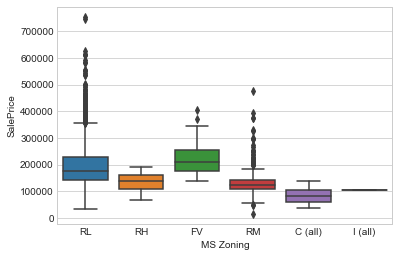

In [202]:
#boxplot
sns.boxplot(x='MS Zoning', y ='SalePrice', data=df_dc)
plt.show()

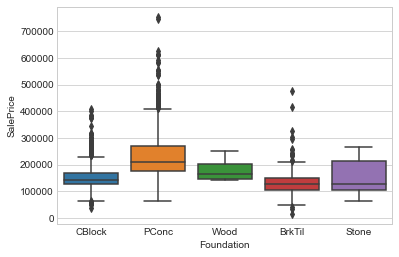

In [203]:
sns.boxplot(x='Foundation', y ='SalePrice', data=df_dc)
plt.show()

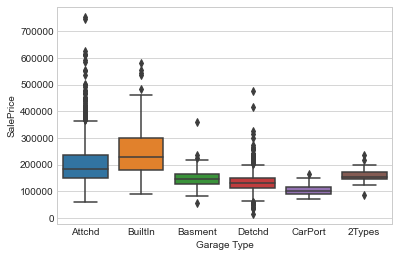

In [204]:
sns.boxplot(x='Garage Type', y ='SalePrice', data=df_dc)
plt.show()


## Principal Component Analysis
Perform a PCA , reducing the dimensionality to 2 Principal components. What is the proportion of variance explained? Plot 2 scatter plots (PCA1 vs SalePrice and PCA2 vs SalePrice). Which Principal component has a higher correlation with SalePrice? 

In [205]:
df_dc.describe()

,Order,PID,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,SalePrice_log
count,2678.000000,2.678000e+03,2678.0,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.0,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.0,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000
mean,1460.237491,7.071561e+08,21.0,10246.545183,6.213592,5.587005,1973.020911,1985.025765,0.0,466.662061,53.461165,570.835698,1090.958925,1170.935026,342.664675,3.755041,1517.354742,0.449589,0.063480,1.575056,0.393577,2.849141,1.028006,6.457804,0.634429,1916.0,1.868559,500.404780,99.137789,48.485810,22.077296,2.703510,16.969754,2.244959,50.783794,6.216580,2007.787155,186405.726288,12.059173
std,846.540228,1.884184e+08,0.0,8075.049290,1.353177,1.069010,29.535837,20.489775,0.0,457.412370,175.366767,435.852712,408.313952,390.649020,431.234162,42.311761,501.995786,0.521733,0.246915,0.549532,0.503692,0.789607,0.169488,1.535866,0.650595,0.0,0.653067,189.068779,128.706531,65.883255,63.910188,25.844891,57.538113,35.627872,585.397482,2.711118,1.318056,79501.568299,0.384510
min,1.000000,5.263011e+08,21.0,1300.000000,2.000000,1.000000,1879.000000,1950.000000,0.0,0.000000,0.000000,0.000000,105.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1916.0,1.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000,9.456341
25%,718.250000,5.284311e+08,21.0,7508.000000,5.000000,5.000000,1955.000000,1967.000000,0.0,0.000000,0.000000,237.250000,819.000000,887.250000,0.000000,0.000000,1146.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1916.0,1.000000,364.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,134575.000000,11.809876
50%,1462.500000,5.354021e+08,21.0,9555.000000,6.000000,5.000000,1976.000000,1994.000000,0.0,405.000000,0.000000,474.000000,1016.000000,1095.000000,0.000000,0.000000,1456.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1916.0,2.000000,484.000000,13.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,166650.000000,12.023651
75%,2192.750000,9.071260e+08,21.0,11645.000000,7.000000,6.000000,2001.000000,2004.000000,0.0,758.750000,0.000000,808.000000,1327.500000,1402.000000,714.750000,0.000000,1760.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,1916.0,2.000000,584.750000,172.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,218641.750000,12.295190
max,2930.000000,1.007100e+09,21.0,215245.000000,10.000000,9.000000,2010.000000,2010.000000,0.0,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,2.000000,2.000000,4.000000,2.000000,6.000000,3.000000,15.000000,4.000000,1916.0,5.000000,1488.000000,1424.000000,570.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000,13.534473


In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['Order', 'PID', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built','Year Remod/Add','Mas Vnr Area','BsmtFin SF 1',\
    'BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','1st Flr SF','2nd Flr SF','Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath','Full Bath', \
        'Half Bath','Bedroom AbvGr', 'Kitchen AbvGr','TotRms AbvGrd', 'Fireplaces','Garage Yr Blt','Garage Cars','Wood Deck SF','Open Porch SF','Enclosed Porch',\
            '3Ssn Porch', 'Screen Porch','Pool Area','Misc Val', 'Mo Sold', 'Yr Sold' ]
# Separating out the features
x = df_dc.loc[:, features].values
# Separating out the SalePrice
y = df_dc.loc[:,['SalePrice']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [141]:
from sklearn.preprocessing import StandardScaler
features = ['Order', 'PID', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built','Year Remod/Add','Mas Vnr Area','BsmtFin SF 1',\
    'BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','1st Flr SF','2nd Flr SF','Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath','Full Bath', \
        'Half Bath','Bedroom AbvGr', 'Kitchen AbvGr','TotRms AbvGrd', 'Fireplaces','Garage Yr Blt','Garage Cars','Wood Deck SF','Open Porch SF','Enclosed Porch',\
            '3Ssn Porch', 'Screen Porch','Pool Area','Misc Val', 'Mo Sold', 'Yr Sold' ]
# Separating out the features
x = df_dc.loc[:, features].values
# Separating out the SalePrice
y = df_dc.loc[:,['SalePrice']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [208]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
            , columns = ['principal component 1', 'principal component 2'])

In [225]:
finalDf = pd.concat([principalDf, df_dc[['SalePrice']]], axis = 1)
finalDf

,principal component 1,principal component 2,SalePrice
0,0.676769,0.059739,215000.0
1,-1.071214,0.257240,105000.0
2,0.727912,-0.168670,172000.0
3,2.309641,0.244067,244000.0
4,0.630052,-0.304656,189900.0
...,...,...,...
2924,NaN,NaN,131000.0
2925,NaN,NaN,142500.0
2926,NaN,NaN,131000.0
2928,NaN,NaN,170000.0


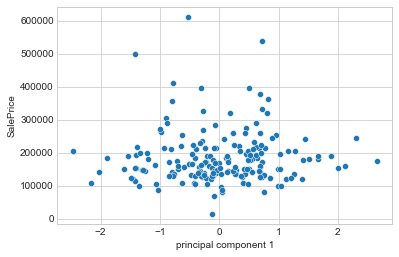

In [238]:
sns.scatterplot(x="principal component 1", y="SalePrice", data=finalDf);

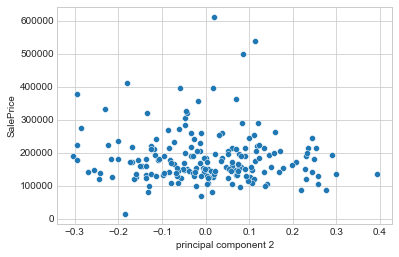

In [239]:
sns.scatterplot(x="principal component 2", y="SalePrice", data=finalDf);

In [226]:
pca_2 = PCA(n_components=2, random_state=2020)
pca_2.fit(x)
x_pcs_2=pca_2.transform(x)

Visualize 2 Component PCA

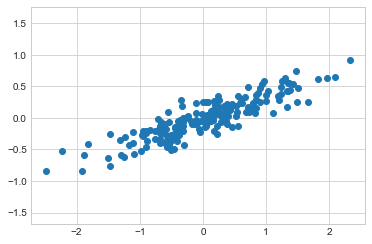

In [211]:
rng = np.random.RandomState(1)
x = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(x[:, 0], x[:, 1])
plt.axis('equal');

In [222]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)

PCA(n_components=2)

In [234]:
X = finalDf.drop('SalePrice', 1)
y = finalDf['SalePrice']

In [236]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, rng=1)

TypeError: train_test_split() got an unexpected keyword argument 'rng'